Spread: -11
Over/Under: 220
Percent of bets on the favorite: 67
Favorite: Lakers
Underdog: Pistons

The projected outcome of the game is:

Lakers         112.95
Pistons        107.05

The Lakers are projected to win by 5.9 points

Original Spread: -11.0
Optimized Spread: -5.9

Bet Suggestion: 
Bet the spread on the Pistons


Projected box score: 
            1     2     3      4
Lakers   28.2  56.5  84.7  113.0
Pistons  26.8  53.5  80.3  107.0




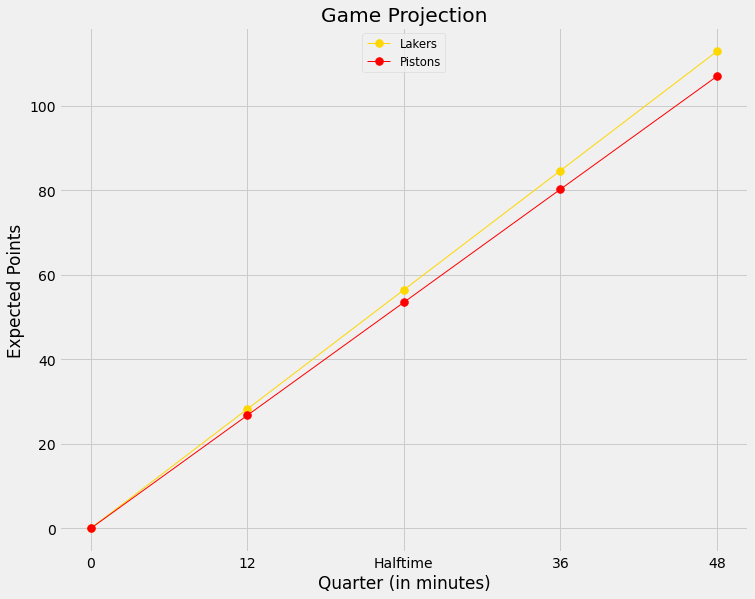

In [18]:
import numpy as np
import pandas as pd
def game_projection(spread, total, percent_of_bets, favteam, underdog):
    if spread<0:
        spread = spread *-1
    else:
        pass
    betsfinal = (percent_of_bets)/100
    optimizer = (spread + ((.5 - betsfinal)*30))
    ospread = (format(optimizer, ".2"))
    ospread = float(ospread)
    x = ((total + ospread)/2)
    y = total - x
    total = x + y
    ospread = x - y
    print(f"\nThe projected outcome of the game is:\n")
    favtotal = f"{favteam.title():<15}{x:>1}"
    print(favtotal)
    dogtotal = f"{underdog.title():<15}{y:>1}"
    print(dogtotal)
    format_ospread = "{:.1f}".format(ospread)
    format_ospread = float(format_ospread)*-1
    if format_ospread <0:
        points_final = format_ospread*-1
        print(f"\nThe {favteam.title()} are projected to win by {points_final} points")
    if format_ospread>0:
        print(f"\nUpset Alert! The {underdog.title()} are projected to win by {format_ospread} points")
    print(f"\nOriginal Spread: -{spread}")
    if format_ospread > 0:
        print(f"\bOptimized Spread: +{format_ospread}\n")
    else:
        print(f"\bOptimized Spread: {format_ospread}\n")
        
    spread = spread*-1
    
    #BET SUGGESTION
    print("Bet Suggestion: ")
    bet1 = spread
    bet2 = format_ospread
    bet = bet1 - bet2
    if bet <=-4 and format_ospread >0:
        print(f"Bet the moneline on the {underdog.title()}")
    elif bet <=-4 and format_ospread <0:
        print(f"Bet the spread on the {underdog.title()}")
    elif -4<bet<=-2:
        print(f"Bet the spread on the {underdog.title()}")
    elif -2<bet<2:
        print("Do not bet on this game, there isn't enough edge")
    elif 2<=bet<4:
        print(f"Bet the moneline on the {favteam.title()}")
    elif bet>=4:
        print(f"Bet the spread on the {favteam.title()}")
    print('\n')
    print('Projected box score: ')
    start = 0
    f1 = x/4  
    f2 = x/4+ x/4
    f3 = x/4 + x/4 + x/4 
    f4 = x/4 + x/4 + x/4 + x/4
    favteam_points = start, f1, f2, f3, f4
    favteam_points = tuple([float("{0:.2f}".format(n)) for n in favteam_points])
    u1 = y/4
    u2 = y/4+ y/4  
    u3 = y/4 + y/4 + y/4  
    u4 = y/4 + y/4 + y/4 + y/4
    underdog_points = start, u1, u2, u3, u4
    underdog_points = tuple([float("{0:.2f}".format(n)) for n in underdog_points])
    from pandas import DataFrame
    f1 = "{:.1f}".format(f1)
    f2 = "{:.1f}".format(f2)
    f3 = "{:.1f}".format(f3)
    f4 = "{:.1f}".format(f4)
    u1 = "{:.1f}".format(u1)
    u2 = "{:.1f}".format(u2)
    u3 = "{:.1f}".format(u3)
    u4 = "{:.1f}".format(u4)
    boxscore = {
        "1": [f1, u1],
        "2": [f2, u2],
        "3": [f3, u3],
        "4": [f4, u4]
        
    }
    rows = favteam.title(), underdog.title()
    data = pd.DataFrame(boxscore, rows)
    
    import matplotlib.pyplot as plt
   

    Quarter = ['0','12','Halftime','36', '48']
    Points1 = favteam_points
    Points2 = underdog_points
    
    colors = {
        'bucks': 'forestgreen',
        '76ers': 'royalblue',
        'bulls': 'tab:red',
        'cavaliers': 'tab:brown',
        'cavs': 'tab:brown',
        'celtics': 'green',
        'clippers': 'mediumblue',
        'grizzlies': 'lightskyblue',
        'hawks': 'firebrick',
        'heat': 'maroon',
        'hornets': 'cyan',
        'jazz': 'orange',
        'kings': 'tab:purple',
        'knicks': 'tab:orange',
        'lakers': 'gold',
        'magic': 'blue',
        'mavericks': 'dodgerblue',
        'mavs': 'dodgerblue',
        'nets': 'black',
        'nuggets': 'midnightblue',
        'pacers': 'yellow',
        'pelicans': 'orangered',
        'pistons': 'red',
        'raptors': 'brown',
        'rockets': 'crimson',
        'spurs': 'gray',
        'suns': 'darkorange',
        'thunder': 'royalblue',
        'timberwolves': 'lime',
        'wolves': 'lime',
        'trail blazers': 'tomato',
        'blazers': 'tomato',
        'warriors': 'yellow',
        'wizards': 'lightcoral'
    }
    
    plt.style.use('fivethirtyeight')
    plt.figure(figsize=(11, 9))
    plt.plot(Quarter, Points1, label = favteam.title(), color = colors[favteam], lw = 1, marker = '.', ms = 15)
    plt.plot(Quarter, Points2, label = underdog.title(), color = colors[underdog], lw = 1, marker = '.', ms = 15)
    plt.title('Game Projection')
    plt.xlabel('Quarter (in minutes)')
    plt.ylabel('Expected Points')
    plt.legend(fontsize = 'small', loc=9)
    
    print(data)
    print('\n')
    plt.show()

a = float(input("Spread: "))
b = float(input("Over/Under: "))
c = float(input(f"Percent of bets on the favorite: "))
d = input("Favorite: ")
d = d.lower()
e = input("Underdog: ")
e = e.lower()
game_projection(a, b, c, d, e)